Estimated wave speed c ≈ 1.9411846485561948


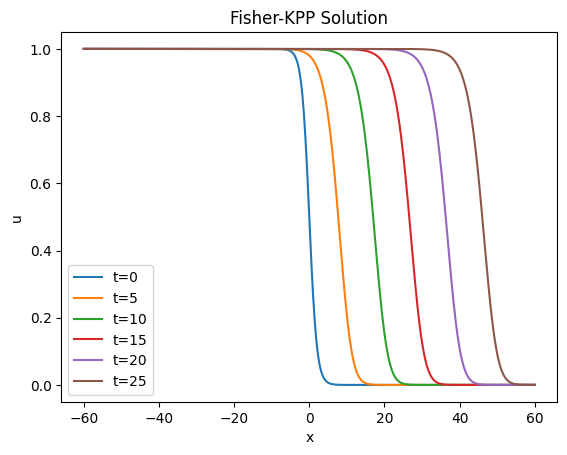

In [10]:
import numpy as np
import matplotlib.pyplot as plt


xL, xR = -60, 60
N = 600
dx = (xR - xL) / N
dt = 0.4 * dx**2      
T = 30
sigma = 1

x = np.linspace(xL, xR, N+1)


#u = 0.5 * np.exp(-x**2 / (2*sigma))
u = 1 / (1+np.exp(x/sigma))

times = []
front = []


t = 0
snapshots = {}

for step in range(int(T/dt)):
    
    if abs(t - round(t/5)*5) < dt:
        snapshots[round(t/5)*5] = u.copy()

   
    if u.max() > 0.5:
        idx = np.argmax(u <= 0.5)
        
        if idx > 0:
            x1, x2 = x[idx-1], x[idx]
            u1, u2 = u[idx-1], u[idx]
            xf = x1 + (0.5-u1)*(x2-x1)/(u2-u1)
        else:
            xf = x[0]
        times.append(t)
        front.append(xf)

    
    un = u.copy()
    lap = (un[2:] - 2*un[1:-1] + un[:-2]) / dx**2
    u[1:-1] = un[1:-1] + dt*(lap + un[1:-1]*(1-un[1:-1]))

    
    u[0] = u[1]
    u[-1] = u[-2]

    t += dt

# estimate c
times = np.array(times)
front = np.array(front)
mask = times > 10          
c_est = np.polyfit(times[mask], front[mask], 1)[0]

print("Estimated wave speed c ≈", abs(c_est))

# Plot
for k in sorted(snapshots.keys()):
    plt.plot(x, snapshots[k], label=f"t={k}")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.title("Fisher-KPP Solution")
plt.show()


In [11]:
print(times)


[0.0000e+00 1.6000e-02 3.2000e-02 ... 2.9936e+01 2.9952e+01 2.9968e+01]


In [12]:
print(front)

[0.00000000e+00 1.61676265e-02 3.24341248e-02 ... 5.56677885e+01
 5.56997590e+01 5.57318057e+01]
